# Analysis and Plots for Inflation Expectations Agent Survey

In [362]:
### Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import statsmodels.api as sm
import statsmodels.formula.api as smf

import ast


## Data Visualization

In [363]:
### Open files here

# Change to analyze desired file
responses = pd.read_csv('results/gpt-4.1-mini-exclusive-treatment-run2/all_experiment_results_20250821_054934.csv')

# Do not change these
context = pd.read_csv('data/indonesia_quarterly_context_updated.csv')
sk_survey = pd.read_csv('data/survei_konsumen_2018_2020.csv')
spe_survey = pd.read_csv('data/SPE_survey.csv')

In [364]:
# Merge experiment results with quarterly context
df = responses.merge(context, on='quarter', how='left')

# Add persona characteristics into individual columns
df['persona'] = df['persona'].apply(ast.literal_eval)
persona_df = pd.json_normalize(df['persona'])
df = pd.concat([df.reset_index(drop=True), persona_df.reset_index(drop=True)], axis=1)

# Remove duplicate column title
df = df.loc[:, ~df.columns.duplicated()]

df.head()

,quarter,persona_id,treatment_group,pre_treatment_expectation,post_treatment_expectation,expectation_change,pre_confidence,post_confidence,pre_reasoning,post_reasoning,...,education,income,region,province,urban_rural,financial_literacy,media_exposure,risk_attitude,expenditure_bracket,expenditure
0,2018Q1,P17557051932824,control,4.0,4.0,0.0,6,6,I expect inflation to be around 4% because Ban...,"Based on what I know, Indonesia's inflation us...",...,Bachelor's Degree,1.255811e+07,Java,Central Java,Urban,6,7,3,5.1-6 Juta,5.437086e+06
1,2018Q1,P17557051939279,full_policy_context,4.0,4.0,0.0,6,6,I expect prices to increase around 4 percent b...,"Bank Indonesia's inflation target is 3.5%, and...",...,Senior High School,1.025106e+07,Sumatra,Bangka Belitung,Urban,6,5,6,5.1-6 Juta,5.240395e+06
2,2018Q1,P17557051937924,current_inflation,6.0,4.0,-2.0,5,5,I expect prices to go up by around 6% because ...,I saw that Bank Indonesia said inflation is 3....,...,Senior High School,4.993563e+06,Java,West Java,Urban,4,5,6,3.1-4 Juta,3.152275e+06
3,2018Q1,P17557051933045,media_narrative,6.0,4.0,-2.0,5,5,I expect prices to go up by around 6 percent b...,"From what I heard, prices seem to be stable an...",...,Senior High School,4.735287e+06,Sulampua,Maluku,Rural,4,3,7,3.1-4 Juta,3.737265e+06
4,2018Q1,P17557051935741,media_narrative,5.0,4.0,-1.0,5,5,I expect prices to go up around 5 percent beca...,"From what I hear, prices seem stable and the r...",...,Senior High School,3.502817e+06,Sulampua,Southeast Sulawesi,Urban,4,6,4,2.1-3 Juta,2.020584e+06


In [365]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [366]:
# Define color for each treatment 
treatment_colors = {
    'control': '#1f77b4',           # blue
    'current_inflation': '#2ca02c', # green
    'inflation_target': '#9467bd',  # purple
    'policy_rate_decision': "#17becf", # cyan
    'full_policy_context': '#ff7f0e',  # orange
    'media_narrative': '#d62728',      # red
    'extra_1': '#9D9D16',           # olive
    'extra_2': '#8c564b',           # brown
}

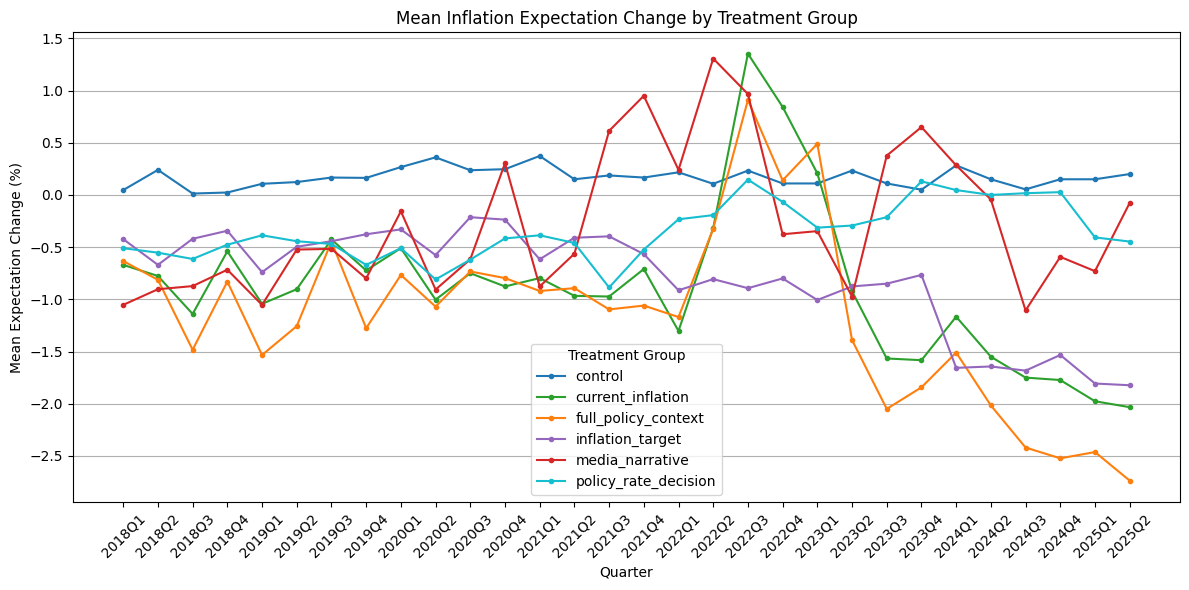

In [367]:
### Mean Expectation Change Plot

grouped = df.groupby(['quarter', 'treatment_group'])['expectation_change'].mean().reset_index()
pivot_df = grouped.pivot(index='quarter', columns='treatment_group', values='expectation_change')

plt.figure(figsize=(12, 6))

for column in pivot_df.columns:
    plt.plot(
        pivot_df.index,
        pivot_df[column],
        marker='.',
        label=column,
        color=treatment_colors.get(column, '#333333')  # fallback color
    )

plt.title('Mean Inflation Expectation Change by Treatment Group')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.ylabel('Mean Expectation Change (%)')

plt.legend(title='Treatment Group')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

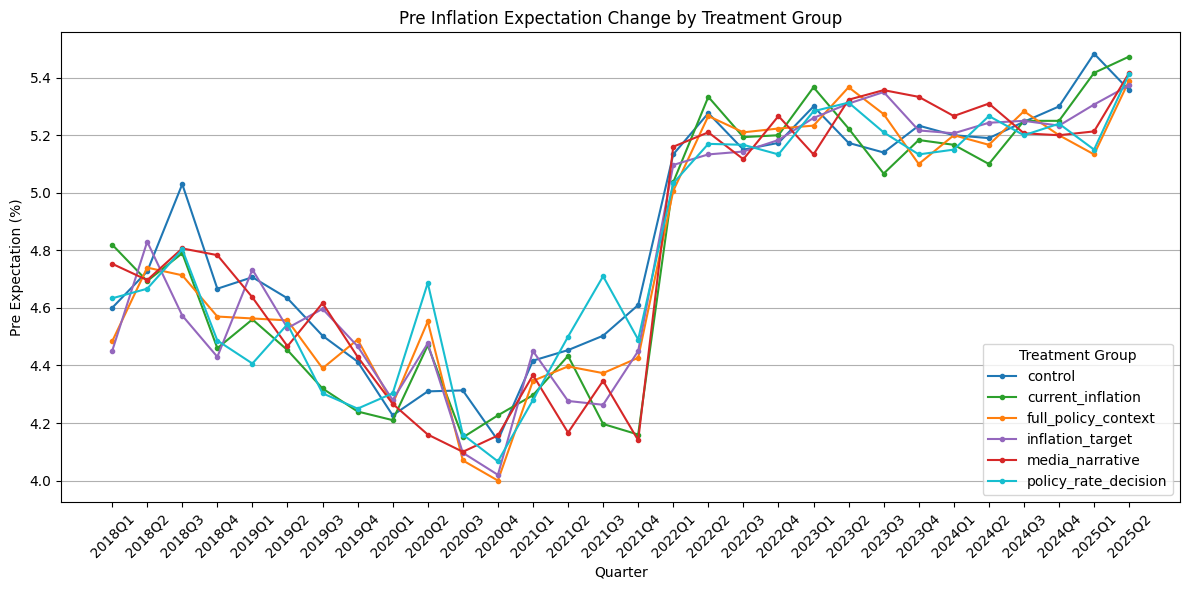

In [368]:
### Pre Expectation Plot

grouped = df.groupby(['quarter', 'treatment_group'])['pre_treatment_expectation'].mean().reset_index()
pivot_df = grouped.pivot(index='quarter', columns='treatment_group', values='pre_treatment_expectation')

plt.figure(figsize=(12, 6))

for column in pivot_df.columns:
    plt.plot(
        pivot_df.index,
        pivot_df[column],
        marker='.',
        label=column,
        color=treatment_colors.get(column, '#333333')  # fallback color
    )

plt.title('Pre Inflation Expectation Change by Treatment Group')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.ylabel('Pre Expectation (%)')

plt.legend(title='Treatment Group')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

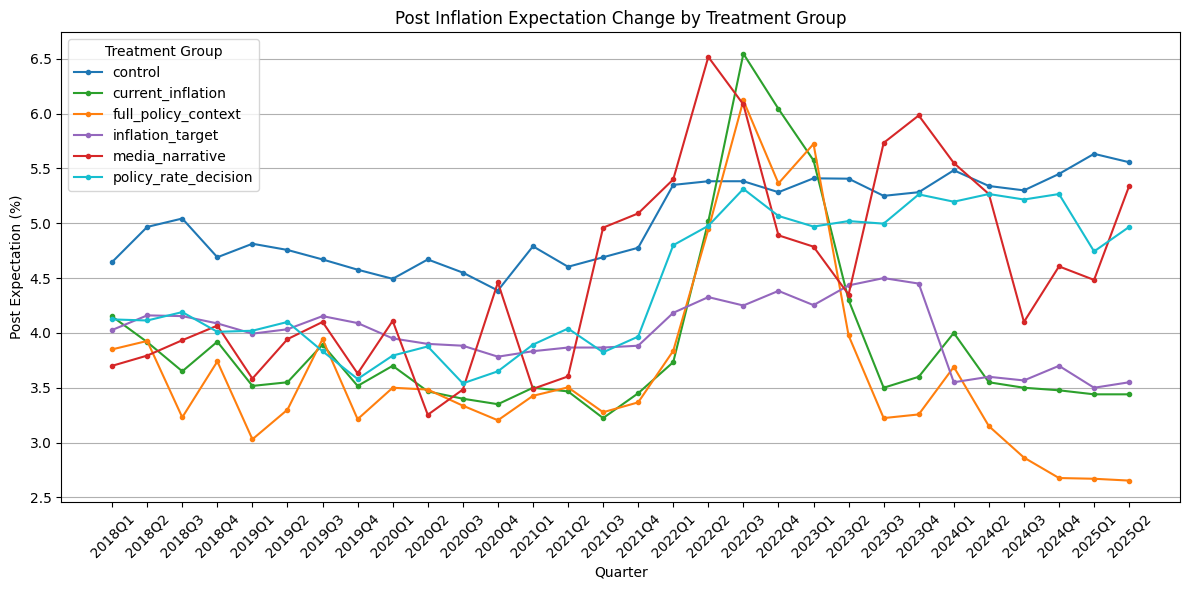

In [369]:
### Post Expectation Plot

grouped = df.groupby(['quarter', 'treatment_group'])['post_treatment_expectation'].mean().reset_index()
pivot_df = grouped.pivot(index='quarter', columns='treatment_group', values='post_treatment_expectation')

plt.figure(figsize=(12, 6))

for column in pivot_df.columns:
    plt.plot(
        pivot_df.index,
        pivot_df[column],
        marker='.',
        label=column,
        color=treatment_colors.get(column, '#333333')  # fallback color
    )

plt.title('Post Inflation Expectation Change by Treatment Group')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.ylabel('Post Expectation (%)')

plt.legend(title='Treatment Group')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

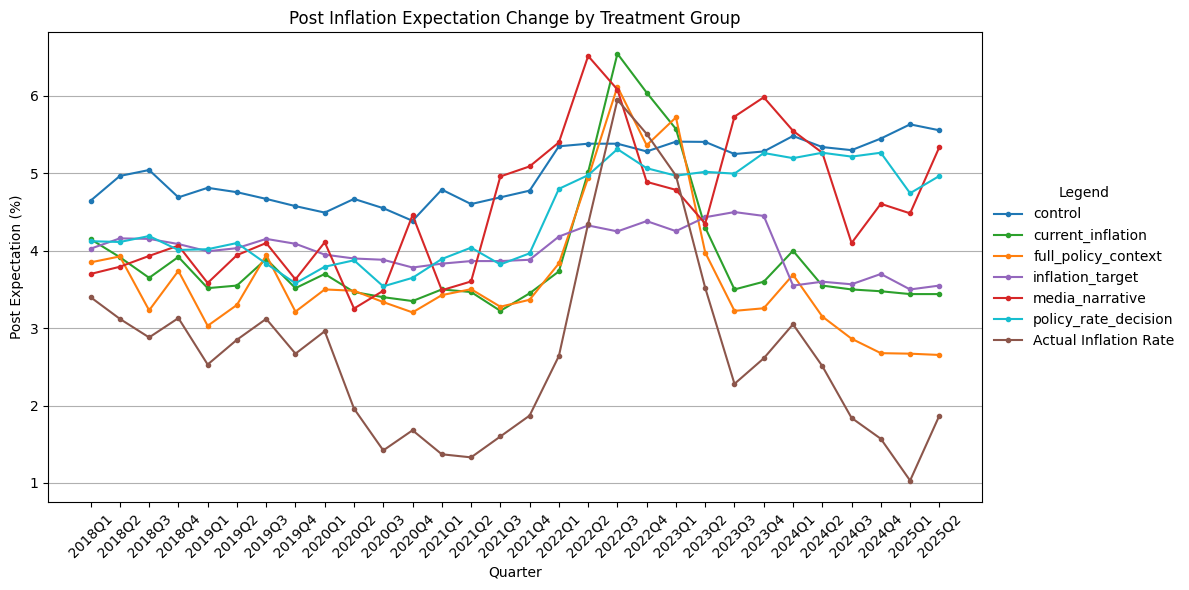

In [370]:
### Post Expectation Plot

grouped = df.groupby(['quarter', 'treatment_group'])['post_treatment_expectation'].mean().reset_index()
pivot_df = grouped.pivot(index='quarter', columns='treatment_group', values='post_treatment_expectation')

plt.figure(figsize=(12, 6))

# Plot treatment groups
for column in pivot_df.columns:
    plt.plot(
        pivot_df.index,
        pivot_df[column],
        marker='.',
        label=column,
        color=treatment_colors.get(column, '#333333')
    )

# Plot actual inflation
plt.plot(
    context['quarter'],
    context['current_inflation'],
    marker='.',
    color='#8c564b',
    label='Actual Inflation Rate'
)

plt.title('Post Inflation Expectation Change by Treatment Group')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.ylabel('Post Expectation (%)')

plt.legend(
    title='Legend',
    loc='center left',
    bbox_to_anchor=(1, 0.5),  # push legend to the right
    ncol=1,                      # vertical layout
    frameon=False
)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

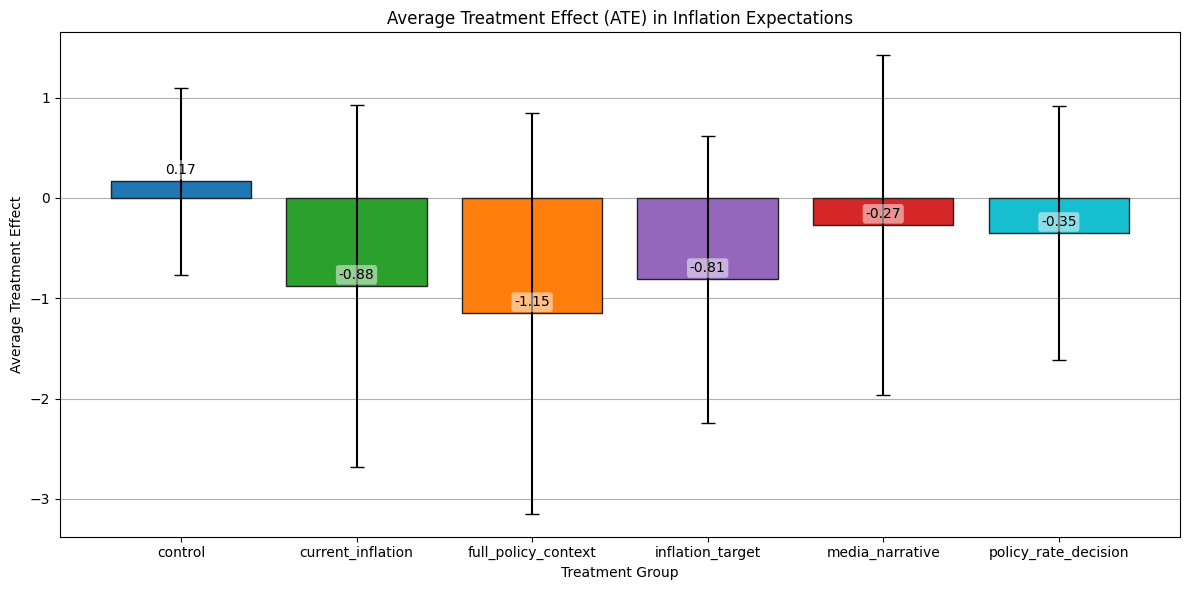

In [371]:
# Aggregate treatment group expectation change and plot
treatment_means = (
    df.groupby('treatment_group')['expectation_change']
      .agg(mean='mean', std='std')
      .reset_index()
      .assign(error=lambda x: x['std'] * 1.96)
)

### Treatment Effects Box Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Box plots
bars = ax.bar(
    treatment_means['treatment_group'],
    treatment_means['mean'],
    yerr=treatment_means['error'],
    color=[treatment_colors.get(t, '#333333') for t in treatment_means['treatment_group']],
    capsize=5,
    edgecolor='#222222'
)

# Add value labels
for bar, mean in zip(bars, treatment_means['mean']):
    height = bar.get_height()
    ax.annotate(f'{mean:.2f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.5))

ax.set_title('Average Treatment Effect (ATE) in Inflation Expectations')
ax.set_ylabel('Average Treatment Effect')
ax.set_xlabel('Treatment Group')

ax.grid(axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


/var/folders/js/llpst9x50cz2s38p3ntgq7580000gn/T/ipykernel_55899/2858542724.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(treatment_means['treatment_group'], rotation=20, ha='right')
/var/folders/js/llpst9x50cz2s38p3ntgq7580000gn/T/ipykernel_55899/2858542724.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(treatment_means['treatment_group'], rotation=20, ha='right')
/var/folders/js/llpst9x50cz2s38p3ntgq7580000gn/T/ipykernel_55899/2858542724.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(treatment_means['treatment_group'], rotation=20, ha='right')
/var/folders/js/llpst9x50cz2s38p3ntgq7580000gn/T/ipykernel_55899/2858542724.py:56: UserWarning: set_ticklabels() should o

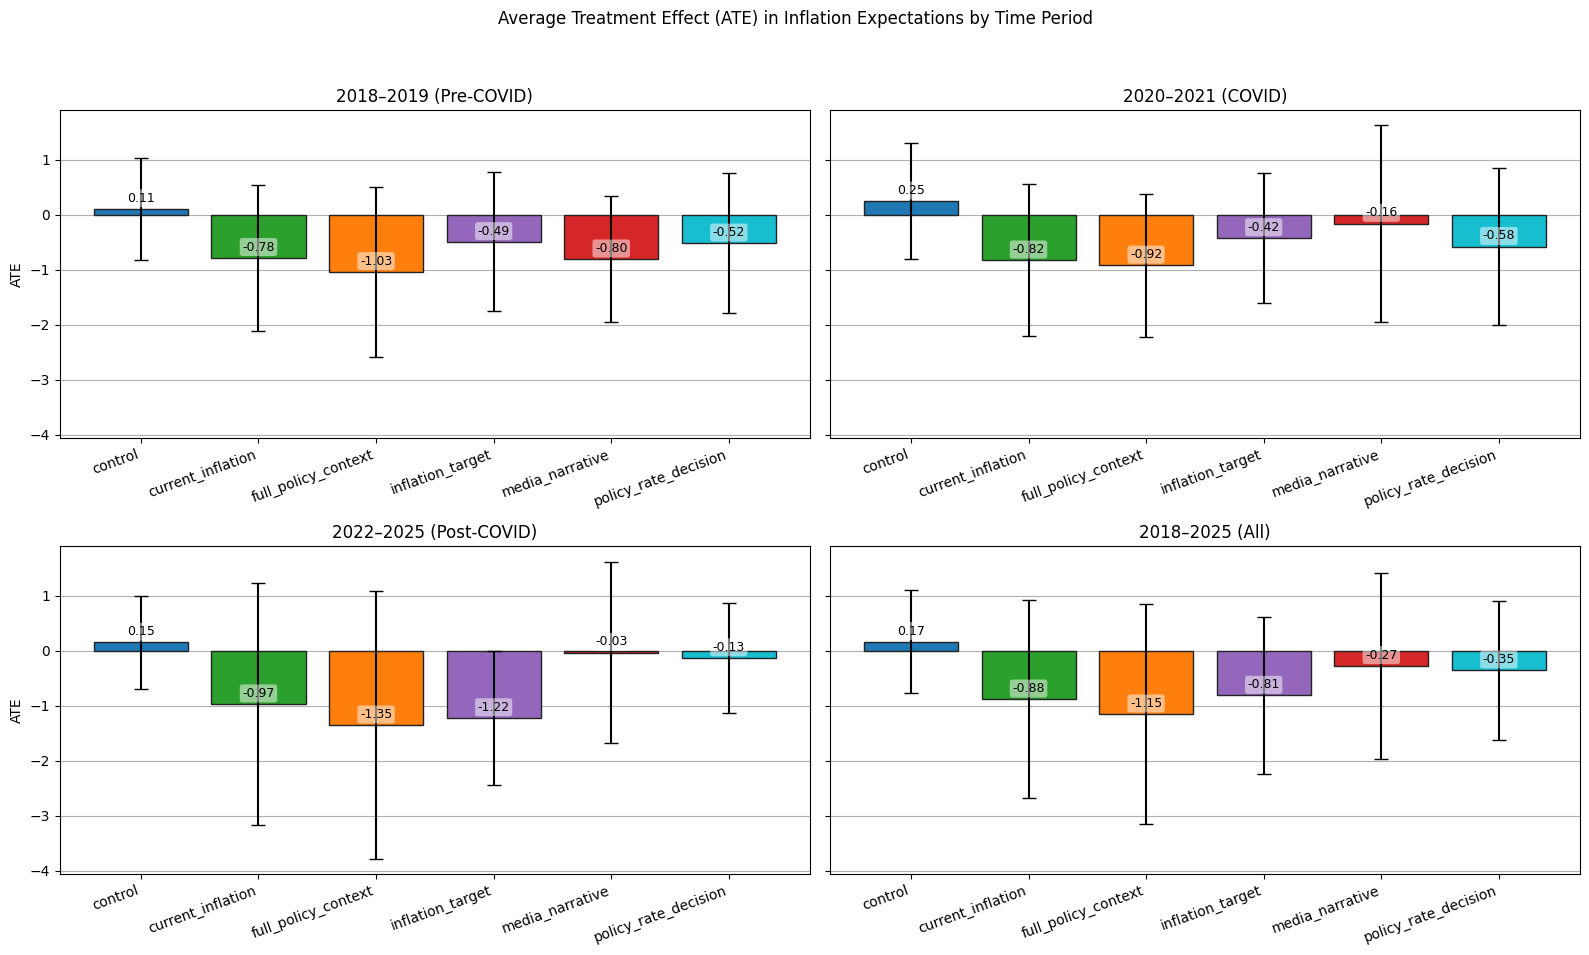

In [ ]:
df['quarter'] = pd.PeriodIndex(df['quarter'], freq='Q')

# Define quarter ranges
periods = {
    '2018–2019 (Pre-COVID)': ('2018Q1', '2019Q4'),
    '2020–2021 (COVID)': ('2020Q1', '2021Q4'),
    '2022–2025 (Post-COVID)': ('2022Q1', '2025Q4'),
    '2018–2025 (All)': ('2018Q1', '2025Q4')
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
axes = axes.flatten()

for idx, (label, (start, end)) in enumerate(periods.items()):
    ax = axes[idx]
    
    # Filter data
    subset = df[
        (df['quarter'] >= pd.Period(start, freq='Q')) &
        (df['quarter'] <= pd.Period(end, freq='Q'))
    ]
    
    # Compute means and errors
    treatment_means = (
        subset.groupby('treatment_group')['expectation_change']
        .agg(mean='mean', std='std')
        .reset_index()
        .assign(error=lambda x: x['std'] * 1.96)
    )
    
    # Box plot
    bars = ax.bar(
        treatment_means['treatment_group'],
        treatment_means['mean'],
        yerr=treatment_means['error'],
        capsize=5,
        color=[treatment_colors.get(t, '#333333') for t in treatment_means['treatment_group']],
        edgecolor='#222222'
    )
    
    # Add value labels with background box
    for bar, mean in zip(bars, treatment_means['mean']):
        height = bar.get_height()
        ax.annotate(
            f'{mean:.2f}',
            xy=(bar.get_x() + bar.get_width()/2, height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center', va='bottom', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.5)
        )
    
    ax.set_title(label)
    if idx % 2 == 0:
        ax.set_ylabel('ATE')
    ax.set_xticklabels(treatment_means['treatment_group'], rotation=20, ha='right')
    ax.grid(axis='y')
    ax.set_axisbelow(True)

plt.suptitle('Average Treatment Effect (ATE) in Inflation Expectations by Time Period')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

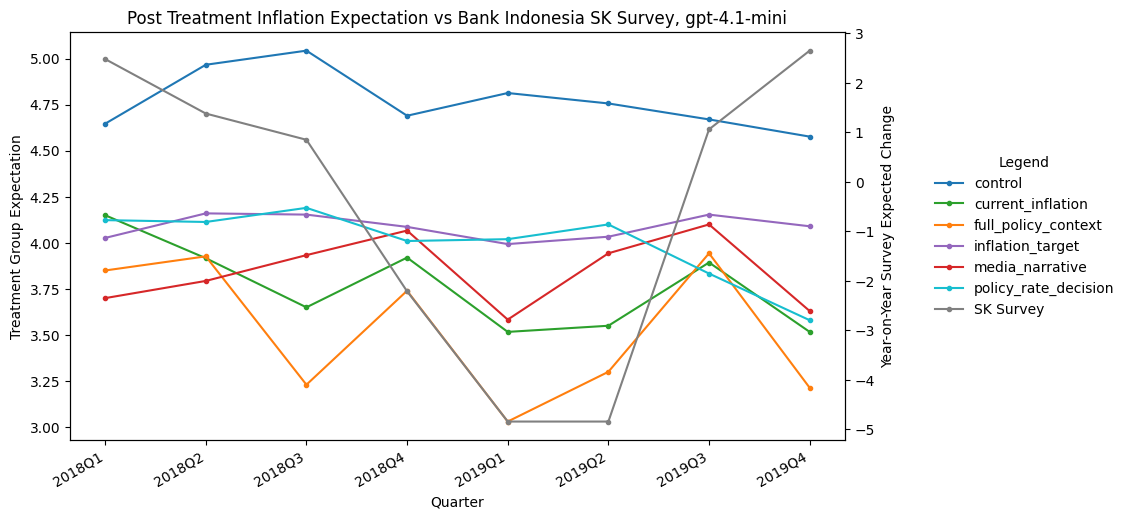

In [ ]:
### Comparison Plot with Consumer Survey

# Slice pivot_df to 2018Q1–2019Q4
mask = (pivot_df.index >= '2018Q1') & (pivot_df.index <= '2019Q4')
pivot_df_trimmed = pivot_df.loc[mask]

# Slice sk_survey to 2018Q1–2019Q4
mask_sk = (sk_survey['quarter'] >= '2018Q1') & (sk_survey['quarter'] <= '2019Q4')
sk_survey_trimmed = sk_survey.loc[mask_sk]

# Prepare plot 
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot treatments
for treatment in pivot_df_trimmed.columns:
    ax1.plot(
        pivot_df_trimmed.index,        # use index for quarter
        pivot_df_trimmed[treatment],
        marker='.',
        color=treatment_colors.get(treatment, '#333333'),
        label=treatment
    )

# Plot SK survey
ax2.plot(
    sk_survey_trimmed['quarter'],
    sk_survey_trimmed['inflation_expectation'],
    marker='.',
    color='grey',
    label='SK Survey'
)

# Labels and title
ax1.set_title('Post Treatment Inflation Expectation vs Bank Indonesia SK Survey, gpt-4.1-mini')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Treatment Group Expectation')
ax2.set_ylabel('Year-on-Year Survey Expected Change')

fig.autofmt_xdate()

# Legends (combined, styled)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    title='Legend',
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),  # push legend to the right
    ncol=1,                      # vertical layout
    frameon=False
)

plt.show()



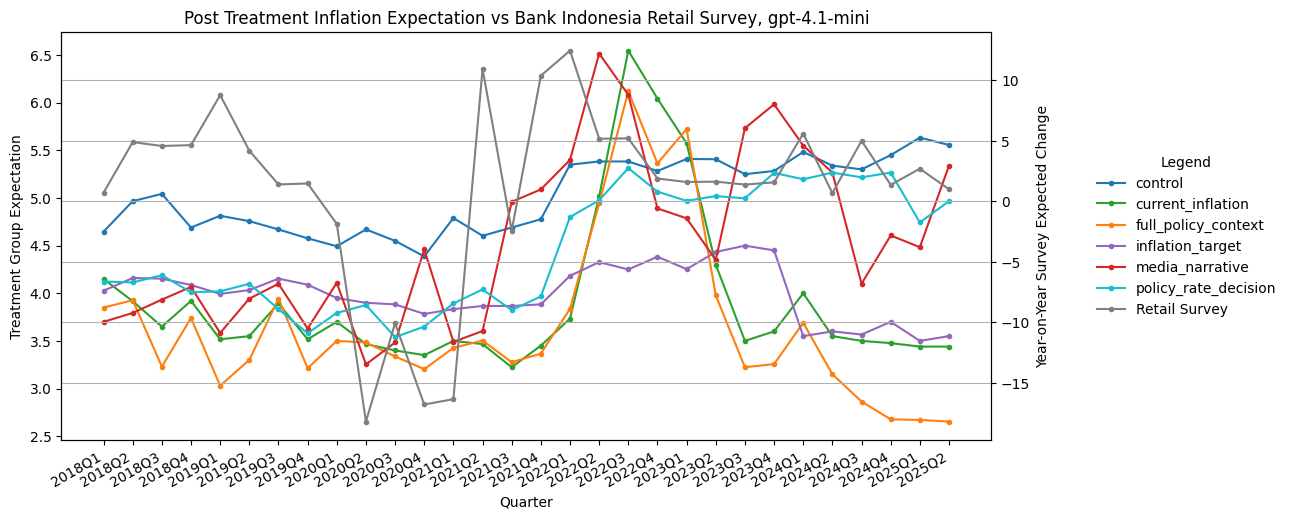

In [ ]:
### Comparison Plot with Retail Survey

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot treatments
for treatment in pivot_df.columns:
    ax1.plot(
        pivot_df.index,
        pivot_df[treatment],
        marker='.',
        color=treatment_colors.get(treatment, '#333333'),
        label=treatment
    )

# Plot retail survey
ax2.plot(
    spe_survey.index,
    spe_survey['index'],
    marker='.',
    color='grey',
    label='Retail Survey'
)

ax1.set_title('Post Treatment Inflation Expectation vs Bank Indonesia Retail Survey, gpt-4.1-mini')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Treatment Group Expectation')
ax2.set_ylabel('Year-on-Year Survey Expected Change')

fig.autofmt_xdate()

# Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    title='Legend',
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),  # push legend to the right
    ncol=1,                      # vertical layout
    frameon=False
)

plt.grid(axis='y')
plt.xticks(rotation=45)

plt.show()


## Regressions

In [382]:
# Baseline OLS with treatment groups as predictors

treatment_model = smf.ols(formula='expectation_change ~ C(treatment_group)', data=df)
results1 = treatment_model.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:     expectation_change   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     331.9
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          8.60e-311
Time:                        14:24:31   Log-Likelihood:                -6428.9
No. Observations:                5400   AIC:                         1.287e+04
Df Residuals:                    5394   BIC:                         1.291e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
tables = results1.summary2().tables

# Convert all tables to DataFrames with string values (preserve index labels)
dfs = [tbl.astype(str) for tbl in tables]

# Insert a blank row DataFrame with matching columns + index
blank0 = pd.DataFrame([[''] * dfs[0].shape[1]], columns=dfs[0].columns)
blank1 = pd.DataFrame([[''] * dfs[1].shape[1]], columns=dfs[1].columns)

# Reset index for coefficients (so variable names become a column)
dfs[1] = dfs[1].reset_index().rename(columns={'index': 'Variable'})

# Reset index for residuals table too
dfs[2] = dfs[2].reset_index().rename(columns={'index': 'Residuals'})

# Combine with spacing
combined = pd.concat([dfs[0], blank0, dfs[1], blank1, dfs[2]], ignore_index=True)

# Save as Excel
combined.to_excel('baseline_ols_results.xlsx', sheet_name='Results', index=False)

In [381]:
# OLS with treatment groups and demographics

demographics_model = smf.ols(formula='''
    expectation_change ~ 
    C(treatment_group) + 
    age + 
    C(gender) + 
    C(education) + 
    np.log(income) + 
    C(urban_rural) + 
    financial_literacy + 
    media_exposure + 
    risk_attitude + 
    np.log(expenditure)
''', data=df)

results2 = demographics_model.fit()
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:     expectation_change   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     123.1
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:23:51   Log-Likelihood:                -6311.0
No. Observations:                5400   AIC:                         1.266e+04
Df Residuals:                    5383   BIC:                         1.277e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
tables = results2.summary2().tables

# Convert all tables to DataFrames with string values (preserve index labels)
dfs = [tbl.astype(str) for tbl in tables]

# Insert a blank row DataFrame with matching columns + index
blank0 = pd.DataFrame([[''] * dfs[0].shape[1]], columns=dfs[0].columns)
blank1 = pd.DataFrame([[''] * dfs[1].shape[1]], columns=dfs[1].columns)

# Reset index for coefficients (so variable names become a column)
dfs[1] = dfs[1].reset_index().rename(columns={'index': 'Variable'})

# Reset index for residuals table too
dfs[2] = dfs[2].reset_index().rename(columns={'index': 'Residuals'})

# Combine with spacing
combined = pd.concat([dfs[0], blank0, dfs[1], blank1, dfs[2]], ignore_index=True)

# Save as Excel
combined.to_excel('demographic_ols_results.xlsx', sheet_name='Results', index=False)

In [ ]:
# OLS with interaction terms

model3 = smf.ols(formula='''
    expectation_change ~ 
    C(treatment_group) * C(gender) + 
    C(treatment_group) * C(education) + 
    C(treatment_group) * C(urban_rural) + 
    age + 
    np.log(income) + 
    np.log(expenditure) + 
    financial_literacy + 
    media_exposure + 
    risk_attitude
''', data=df)

results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:     expectation_change   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     51.22
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:28:07   Log-Likelihood:                -6260.2
No. Observations:                5400   AIC:                         1.260e+04
Df Residuals:                    5358   BIC:                         1.288e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [ ]:
tables = results3.summary2().tables

# Convert all tables to DataFrames with string values (preserve index labels)
dfs = [tbl.astype(str) for tbl in tables]

# Insert a blank row DataFrame with matching columns + index
blank0 = pd.DataFrame([[''] * dfs[0].shape[1]], columns=dfs[0].columns)
blank1 = pd.DataFrame([[''] * dfs[1].shape[1]], columns=dfs[1].columns)

# Reset index for coefficients (so variable names become a column)
dfs[1] = dfs[1].reset_index().rename(columns={'index': 'Variable'})

# Reset index for residuals table too
dfs[2] = dfs[2].reset_index().rename(columns={'index': 'Residuals'})

# Combine with spacing
combined = pd.concat([dfs[0], blank0, dfs[1], blank1, dfs[2]], ignore_index=True)

# Save as Excel
combined.to_excel('interaction_ols_results.xlsx', sheet_name='Results', index=False)